Christopher J. Cavanaugh 

This Notebook uses the ffn library to pull and analyze asset data from Yahoo!. ffn, along with other libraries in the 'import' cell, must be installed.

The Notebook analyzes the YTD (date1, date2) performance of the DOW 30, along with major indices including DJIA, SPDR Gold Trust, Russell 2000 and VIX. Though functions have been written below for other common tasks, three specific tasks have been executed on the YTD data: tickers ranked by absolute returns, histograms of the distribution of daily logarithmic returns and QQPlots/normality tests of logarithmic daily returns.

Other tickers (US tickers only; indices must have carrot(^) in front) can be inputted as strings within a list object and passed to functions or ffn methods. The start and end dates can be adjusted but must be in the form 'yyyy-mm-dd'.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ffn
import math
import scipy.stats as scs
import statsmodels.api as sm

In [212]:
nonCarrotTickers = ['mmm', 'axp','aapl', 'ba', 'cat', 'cvx', 'csco', 'ko', 
                'dwdp', 'xom', 'gs', 'hd', 'ibm', 'intc', 'jnj', 
                'jpm', 'mcd', 'mrk', 'msft', 'nke', 'pfe', 'pg', 'trv', 
                'unh', 'utx', 'vz', 'v', 'wmt', 'wba', 'dis',  'dji', 'gld', 'rut', 'vix']
ffnTickers = ['mmm', 'axp','aapl', 'ba', 'cat', 'cvx', 'csco', 'ko', 
                'dwdp', 'xom', 'gs', 'hd', 'ibm', 'intc', 'jnj', 
                'jpm', 'mcd', 'mrk', 'msft', 'nke', 'pfe', 'pg', 'trv', 
                'unh', 'utx', 'vz', 'v', 'wmt', 'wba', 'dis',  '^dji', 'gld', '^rut', '^vix']
indexDict = {'dji':'^dji', 'rut':'^rut', 'vix':'^vix'}

In [193]:
#tickers mist be list of strings, index tickers must be preceeded by carrot (ex. ^dji NOT dji)
#startDate and endDate must be strings in format yyyy-mm-dd
def getAssetData(tickers, startDate, endDate):
    returnData = pd.DataFrame()
    for i in tickers:
        data = ffn.get([i], start = startDate, end = endDate)
        returnData = pd.concat([returnData, data], axis = 1)
        returnData = returnData.rename(indexDict, axis = 'columns')
    return returnData
dow30plus = getAssetData(ffnTickers, date1, date2)

def displayStats(tickers, startDate, endDate):
    returnData = pd.DataFrame()
    for i in tickers:
        data = ffn.get([i], start = startDate, end = endDate)
        returnData = pd.concat([returnData, data], axis = 1)
        returnData = returnData.rename(indexDict, axis = 'columns')
    return returnData.calc_stats().display()

def rebasePlot(tickers, startDate, endDate):
    returnData = pd.DataFrame()
    for i in tickers:
        data = ffn.get([i], start = startDate, end = endDate)
        returnData = pd.concat([returnData, data], axis = 1)
        returnData = returnData.rename(indexDict, axis = 'columns')
    return returnData[tickers].rebase().plot(figsize=(20,8))

def absReturnsToDate(tickers, startDate, endDate):
    returnData = pd.DataFrame()
    for i in tickers:
        data = ffn.get([i], start = startDate, end = endDate)
        returnData = pd.concat([returnData, data], axis = 1)
        returnData = returnData.rename(indexDict, axis = 'columns')
    return returnData[tickers].rebase().sort_values(returnData.last_valid_index(), axis=1, ascending=False)

def logReturnHist(tickers, startDate, endDate):
    returnData = pd.DataFrame()
    for i in tickers:
        data = ffn.get([i], start = startDate, end = endDate)
        returnData = pd.concat([returnData, data], axis = 1)
        returnData = returnData.rename(indexDict, axis = 'columns')
    logReturns = returnData.to_log_returns().dropna()
    return logReturns.hist(figsize = (20, 8))

def logCorr(tickers, startDate, endDate, xTicker):
    returnData = pd.DataFrame()
    for i in tickers:
        data = ffn.get([i], start = startDate, end = endDate)
        returnData = pd.concat([returnData, data], axis = 1)
        returnData = returnData.rename(indexDict, axis = 'columns')
    logReturns = returnData.to_log_returns().dropna()
    corrDF1 = logReturns.corr()
    return corrDF[[xTicker]].sort_values(by= xTicker, ascending=False)

def logCoorHeatMap(tickers, startDate, endDate):
    returnData = pd.DataFrame()
    for i in tickers:
        data = ffn.get([i], start = startDate, end = endDate)
        returnData = pd.concat([returnData, data], axis = 1)
        returnData = returnData.rename(indexDict, axis = 'columns')
    logReturns = returnData.to_log_returns().dropna()
    return logReturns.plot_corr_heatmap()

def qqplotFunc(tickers, startDate, endDate):
    returnData = pd.DataFrame()
    for i in tickers:
        data = ffn.get([i], start = startDate, end = endDate)
        returnData = pd.concat([returnData, data], axis = 1)
        returnData = returnData.rename(indexDict, axis = 'columns')   
        logReturns = returnData.to_log_returns().dropna()
        sm.qqplot(logReturns[i].dropna(), line='s')
        plt.title(i.upper())
        plt.xlabel('Theoretical Quantiles')
        plt.ylabel('Returns Quantiles')

In [216]:
#Ticker ranked by greatest YTD returns
date1 = '2018-04-27'
date2 = '2019-04-27'
list(absReturnsToDate(ffnTickers, date1, date2))

['pg',
 'dis',
 'msft',
 'mrk',
 'v',
 'csco',
 'nke',
 'mcd',
 'aapl',
 'axp',
 'wmt',
 'utx',
 'ko',
 'vz',
 'ba',
 'jnj',
 'hd',
 'pfe',
 '^dji',
 'xom',
 'trv',
 'jpm',
 '^rut',
 'intc',
 'mmm',
 'unh',
 'ibm',
 'cat',
 'gld',
 'cvx',
 'dwdp',
 'gs',
 '^vix',
 'wba']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c291e5048>,
      dtype=object)

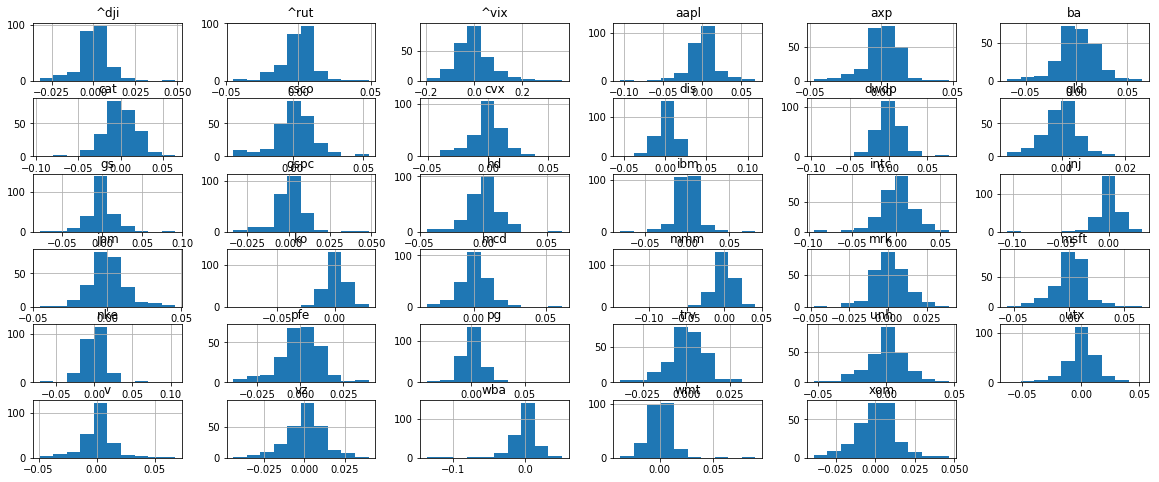

In [206]:
#Distribution of logarithmic daily returns of all DJIA tickers and some major indices
logReturnHist(ffnTickers, date1, date2)

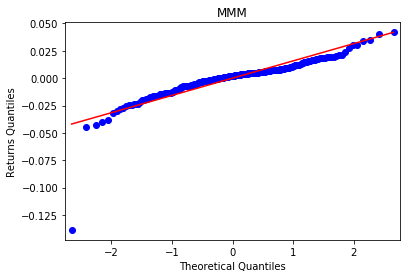

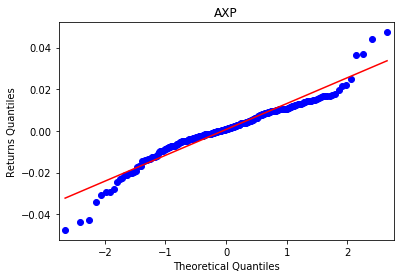

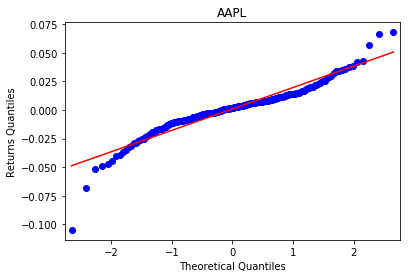

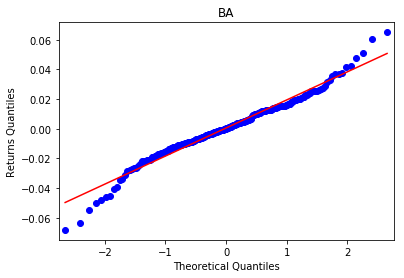

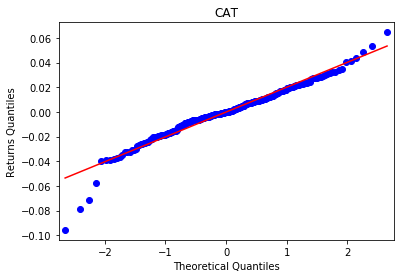

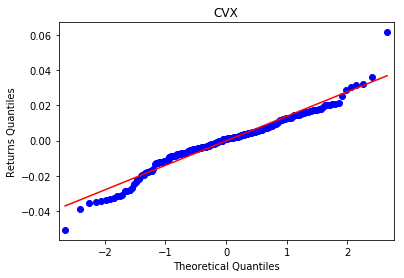

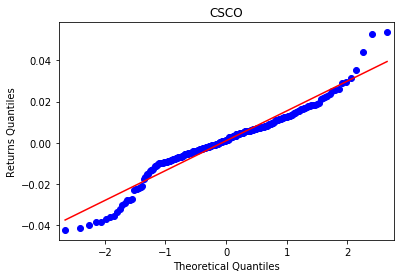

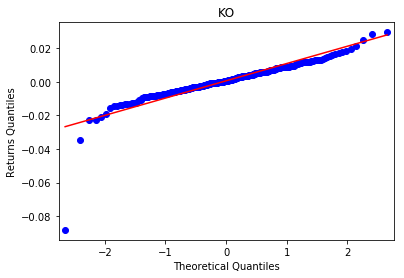

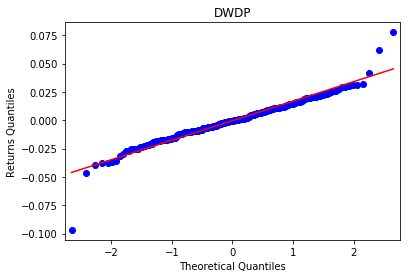

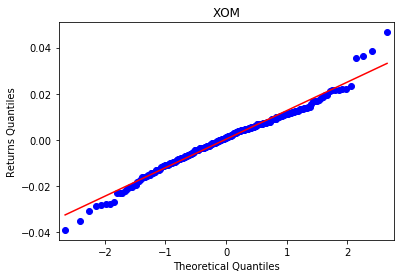

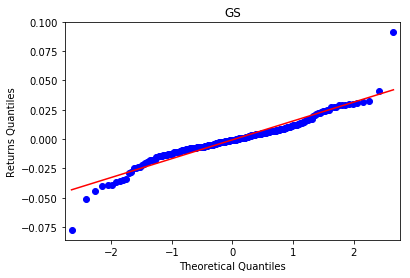

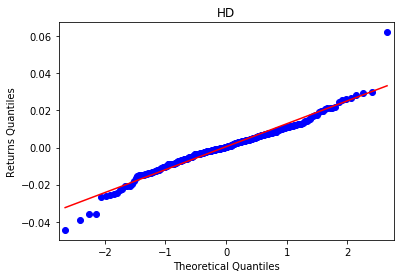

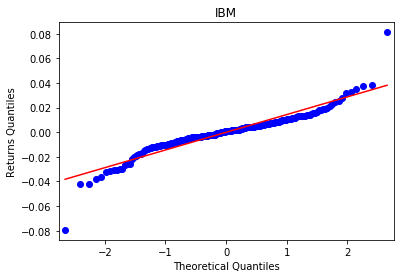

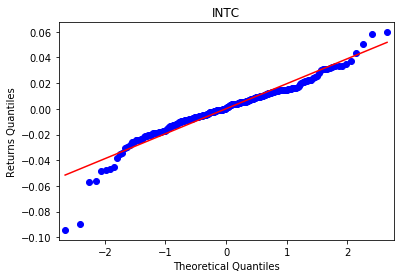

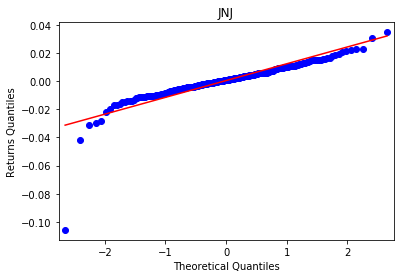

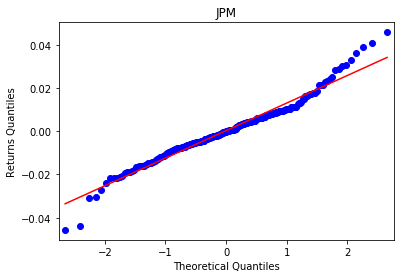

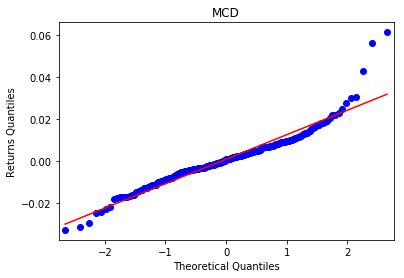

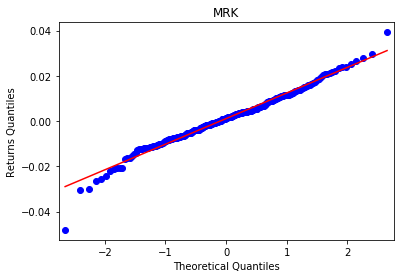

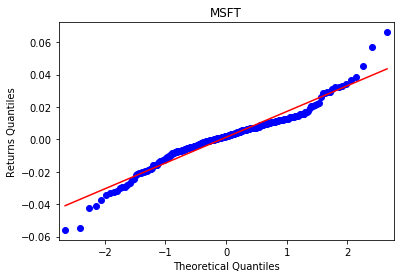

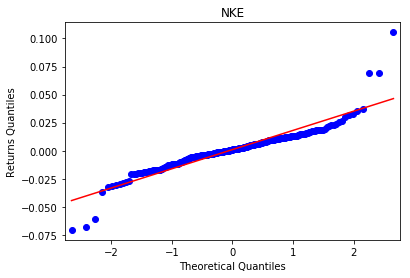

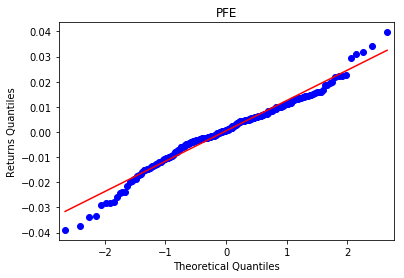

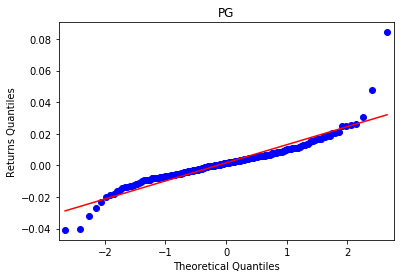

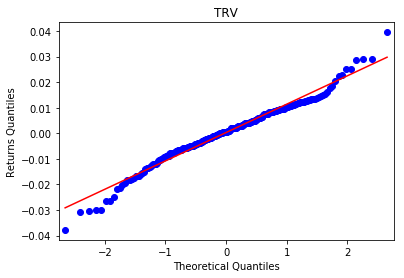

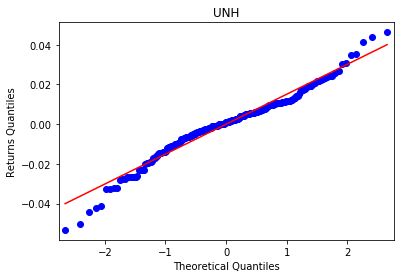

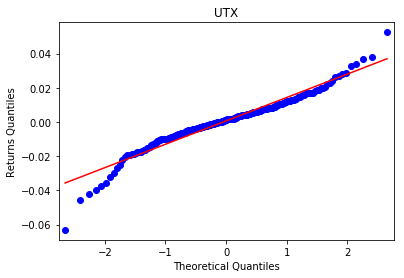

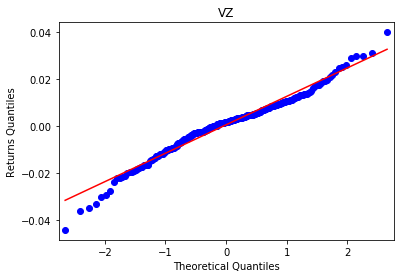

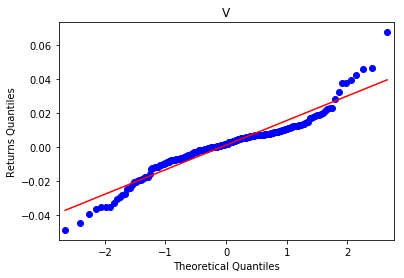

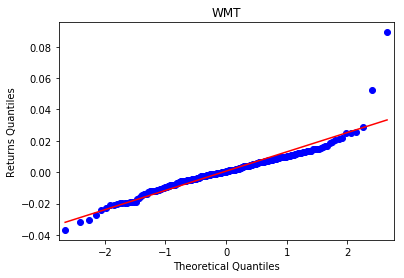

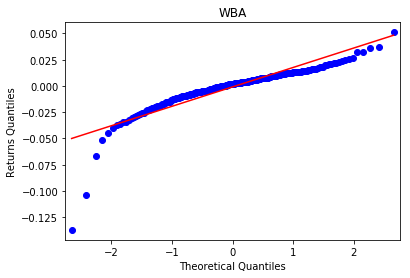

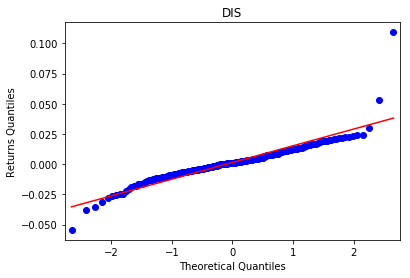

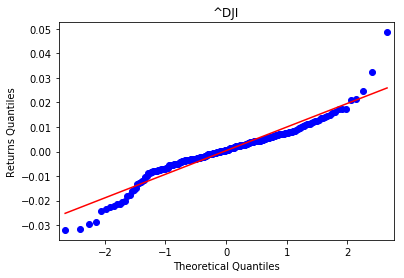

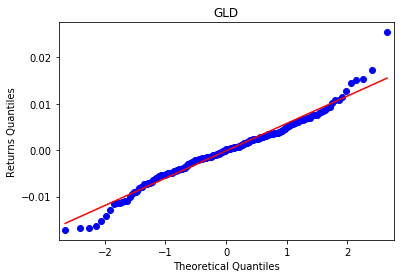

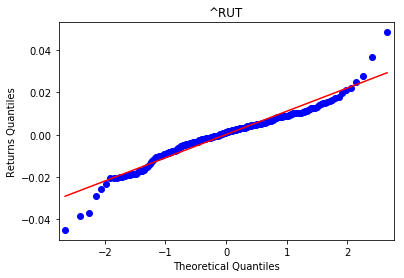

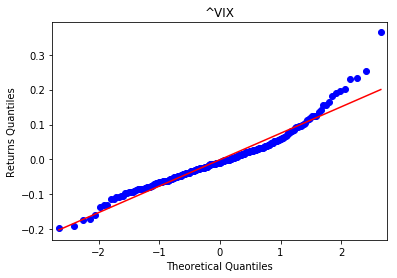

In [213]:
#QQPlot/normality test of logarithmic daily returns of all DJIA tickers and some major indices
qqplotFunc(ffnTickers, date1, date2)